In [6]:
# 폰트 문제 해결하기
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [101]:
# data1 = pd.read_excel("서울시 부동산 시장 소비심리지수.xlsx")
data2 = pd.read_excel("서울시, 구별 월간 매매가격지수.xlsx")
data3 = pd.read_excel("서울시, 구별 월간 지가지수.xlsx")

In [102]:
data2.head()

,지 역,2003년 11월,2003년 12월,2004년 01월,2004년 02월,2004년 03월,2004년 04월,2004년 05월,2004년 06월,2004년 07월,...,2017년 07월,2017년 08월,2017년 09월,2017년 10월,2017년 11월,2017년 12월,2018년 01월,2018년 02월,2018년 03월,2018년 04월
0,서울,61.6,61.2,61.0,61.4,61.7,62.1,62.2,62.1,61.9,...,98.7,99.3,99.3,99.6,100,100.8,102.2,103.6,104.4,104.8
1,종로구,64.3,64.2,64.0,64.4,64.4,65.1,65.1,65.1,65.1,...,98.5,99.2,99.3,99.6,100,100.2,101.0,102.0,102.6,103.4
2,중구,70.2,69.5,69.6,69.9,70.1,70.4,70.4,70.4,70.1,...,98.5,99.1,99.2,99.5,100,100.6,101.2,102.4,103.7,104.5
3,용산구,58.1,57.8,58.1,58.9,59.5,60.8,61.4,62.3,62.8,...,98.9,99.6,99.6,99.8,100,100.2,101.6,104.5,106.0,106.5
4,성동구,58.9,58.6,58.8,59.5,59.9,60.6,61.1,61.5,61.4,...,99.2,99.6,99.2,99.3,100,101.6,103.4,105.5,106.7,106.9


In [103]:
data2.set_index(keys="지 역", inplace=True)
data2.head()

,2003년 11월,2003년 12월,2004년 01월,2004년 02월,2004년 03월,2004년 04월,2004년 05월,2004년 06월,2004년 07월,2004년 08월,...,2017년 07월,2017년 08월,2017년 09월,2017년 10월,2017년 11월,2017년 12월,2018년 01월,2018년 02월,2018년 03월,2018년 04월
지 역,,,,,,,,,,,,,,,,,,,,,
서울,61.6,61.2,61.0,61.4,61.7,62.1,62.2,62.1,61.9,61.5,...,98.7,99.3,99.3,99.6,100,100.8,102.2,103.6,104.4,104.8
종로구,64.3,64.2,64.0,64.4,64.4,65.1,65.1,65.1,65.1,65.0,...,98.5,99.2,99.3,99.6,100,100.2,101.0,102.0,102.6,103.4
중구,70.2,69.5,69.6,69.9,70.1,70.4,70.4,70.4,70.1,70.1,...,98.5,99.1,99.2,99.5,100,100.6,101.2,102.4,103.7,104.5
용산구,58.1,57.8,58.1,58.9,59.5,60.8,61.4,62.3,62.8,61.9,...,98.9,99.6,99.6,99.8,100,100.2,101.6,104.5,106.0,106.5
성동구,58.9,58.6,58.8,59.5,59.9,60.6,61.1,61.5,61.4,61.5,...,99.2,99.6,99.2,99.3,100,101.6,103.4,105.5,106.7,106.9


In [104]:
col = []
for i in data2.columns:
    col.append(i.split()[0][:-1]+"."+i.split()[1][:-1])
col[:5]
data2.columns = col

In [105]:
data2.head()

,2003.11,2003.12,2004.01,2004.02,2004.03,2004.04,2004.05,2004.06,2004.07,2004.08,...,2017.07,2017.08,2017.09,2017.10,2017.11,2017.12,2018.01,2018.02,2018.03,2018.04
지 역,,,,,,,,,,,,,,,,,,,,,
서울,61.6,61.2,61.0,61.4,61.7,62.1,62.2,62.1,61.9,61.5,...,98.7,99.3,99.3,99.6,100,100.8,102.2,103.6,104.4,104.8
종로구,64.3,64.2,64.0,64.4,64.4,65.1,65.1,65.1,65.1,65.0,...,98.5,99.2,99.3,99.6,100,100.2,101.0,102.0,102.6,103.4
중구,70.2,69.5,69.6,69.9,70.1,70.4,70.4,70.4,70.1,70.1,...,98.5,99.1,99.2,99.5,100,100.6,101.2,102.4,103.7,104.5
용산구,58.1,57.8,58.1,58.9,59.5,60.8,61.4,62.3,62.8,61.9,...,98.9,99.6,99.6,99.8,100,100.2,101.6,104.5,106.0,106.5
성동구,58.9,58.6,58.8,59.5,59.9,60.6,61.1,61.5,61.4,61.5,...,99.2,99.6,99.2,99.3,100,101.6,103.4,105.5,106.7,106.9


In [106]:
data2.convert_objects(convert_numeric=True)

E:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


,2003.11,2003.12,2004.01,2004.02,2004.03,2004.04,2004.05,2004.06,2004.07,2004.08,...,2017.07,2017.08,2017.09,2017.10,2017.11,2017.12,2018.01,2018.02,2018.03,2018.04
지 역,,,,,,,,,,,,,,,,,,,,,
서울,61.6,61.2,61.0,61.4,61.7,62.1,62.2,62.1,61.9,61.5,...,98.7,99.3,99.3,99.6,100,100.8,102.2,103.6,104.4,104.8
종로구,64.3,64.2,64.0,64.4,64.4,65.1,65.1,65.1,65.1,65.0,...,98.5,99.2,99.3,99.6,100,100.2,101.0,102.0,102.6,103.4
중구,70.2,69.5,69.6,69.9,70.1,70.4,70.4,70.4,70.1,70.1,...,98.5,99.1,99.2,99.5,100,100.6,101.2,102.4,103.7,104.5
용산구,58.1,57.8,58.1,58.9,59.5,60.8,61.4,62.3,62.8,61.9,...,98.9,99.6,99.6,99.8,100,100.2,101.6,104.5,106.0,106.5
성동구,58.9,58.6,58.8,59.5,59.9,60.6,61.1,61.5,61.4,61.5,...,99.2,99.6,99.2,99.3,100,101.6,103.4,105.5,106.7,106.9
광진구,67.1,67.4,67.4,67.7,68.2,69.0,69.2,69.5,69.4,69.5,...,98.2,98.8,98.9,99.4,100,101.6,103.5,105.3,106.6,107.1
동대문구,61.4,61.0,61.0,61.4,61.5,61.7,62.0,61.7,62.0,62.0,...,99.3,99.5,99.7,99.8,100,100.2,100.5,101.1,101.5,102.0
중랑구,64.9,64.5,64.2,64.4,64.6,64.6,64.6,64.2,63.9,63.7,...,99.4,99.7,99.7,99.8,100,100.1,100.3,100.6,100.9,101.1
성북구,66.4,66.3,66.3,66.1,66.1,66.3,66.3,66.2,66.2,66.2,...,98.7,99.2,99.5,99.7,100,100.3,100.7,101.9,103.4,104.0


In [130]:
data2.loc[구선택[5],:]

2003.11     66.4
2003.12     65.0
2004.01     64.6
2004.02     65.8
2004.03     67.0
2004.04     68.6
2004.05     68.6
2004.06     67.9
2004.07     67.0
2004.08     65.5
2004.09     65.1
2004.10     64.8
2004.11     64.3
2004.12     63.8
2005.01     63.8
2005.02     66.9
2005.03     66.4
2005.04     68.4
2005.05     68.9
2005.06     72.0
2005.07     73.7
2005.08     73.6
2005.09     72.0
2005.10     71.2
2005.11     72.1
2005.12     72.9
2006.01     74.1
2006.02     74.6
2006.03     75.9
2006.04     76.8
           ...  
2015.11     92.6
2015.12     92.6
2016.01     92.3
2016.02     92.1
2016.03     92.0
2016.04     92.1
2016.05     92.4
2016.06     92.6
2016.07     92.9
2016.08     93.5
2016.09     94.1
2016.10     95.3
2016.11     95.8
2016.12     95.7
2017.01     95.6
2017.02     95.8
2017.03     95.9
2017.04     95.9
2017.05     96.6
2017.06     98.5
2017.07     98.7
2017.08     99.5
2017.09     99.3
2017.10     99.7
2017.11    100.0
2017.12    101.2
2018.01    103.1
2018.02    106

In [120]:
data2.index[0]

Index(['서울', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구',
       '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'],
      dtype='object', name='지 역')

## 아래 구선택에서 원하는 구만 바꿔서 입력할 수 있습니다.
- 현재 동작구, 관악구, 서초구, 강남구, 송파구, 강동구만 사용
- 원하는 구를 리스트 안에 더 넣어보세요. 서울시 모든 행정구를 넣을 수도 있습니다.


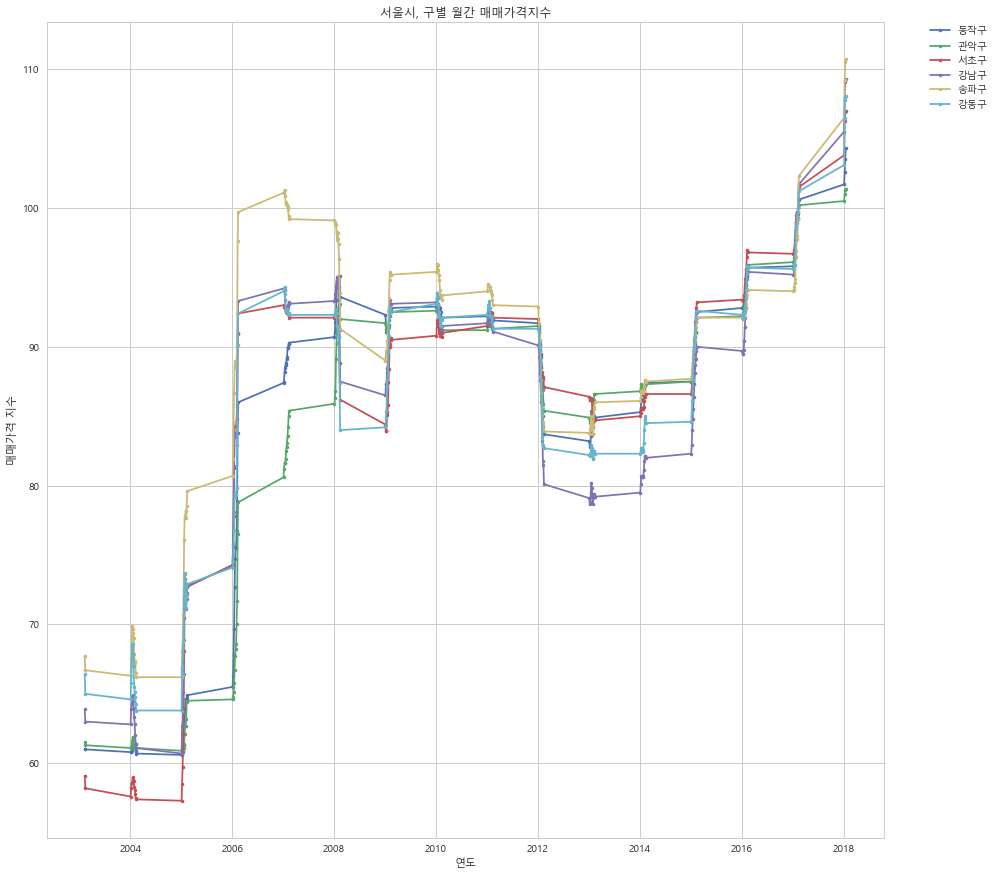

In [135]:
# 현재 동작구, 관악구, 서초구, 강남구, 송파구, 강동구만 사용
# 원하는 구를 리스트 안에 더 넣어보세요. 서울시 모든 행정구를 넣을 수도 있습니다.
구선택 = ['동작구', '관악구', '서초구', '강남구', '송파구', '강동구']


xs = data2.columns # 연도
plt.figure(figsize=(15,15))
for i in range(len(구선택)):
    plt.plot(xs, list(data2.loc[구선택[i],:]), marker= '.', label=구선택[i]) # 녹색 실선

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # 범례 그리기, loc=9 ; top center를 의미
plt.ylabel('매매가격 지수')
plt.xlabel('연도')
plt.title('서울시, 구별 월간 매매가격지수')
plt.show()